# Implementation using NumPy

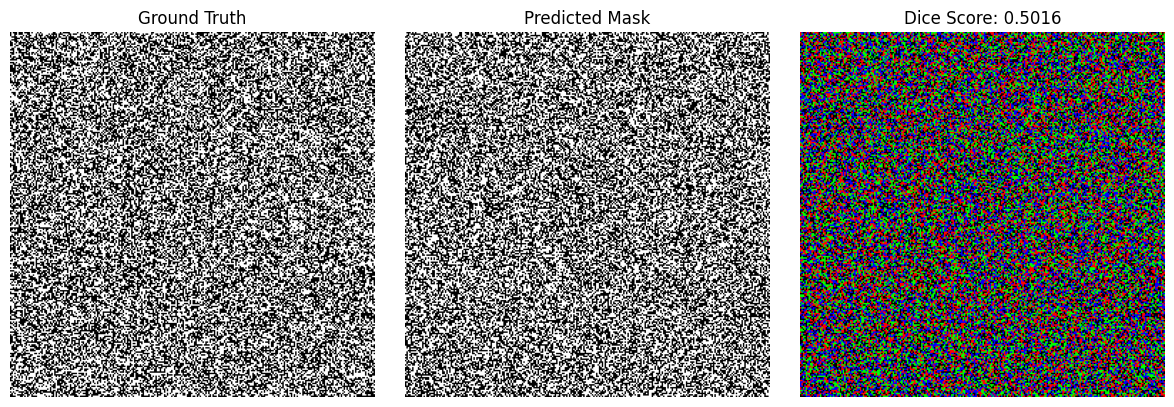

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def dice_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))

# Generate random binary masks
np.random.seed(42)  # Ensures reproducibility
y_true = np.random.randint(0, 2, (256, 256))  # Ground truth mask
y_pred = np.random.randint(0, 2, (256, 256))  # Predicted mask

# Compute Dice Score
dice = dice_score(y_true, y_pred)

# Create an RGB overlay image
overlay = np.zeros((256, 256, 3), dtype=np.uint8)

# Green = True Positives (Correctly segmented)
overlay[(y_true == 1) & (y_pred == 1)] = [0, 255, 0]  

# Red = False Positives (Predicted but not in ground truth)
overlay[(y_true == 0) & (y_pred == 1)] = [255, 0, 0]  

# Blue = False Negatives (Missed segmentation)
overlay[(y_true == 1) & (y_pred == 0)] = [0, 0, 255]  

# Plot the masks
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(y_true, cmap="gray")
ax[0].set_title("Ground Truth")

ax[1].imshow(y_pred, cmap="gray")
ax[1].set_title("Predicted Mask")

ax[2].imshow(overlay)
ax[2].set_title(f"Dice Score: {dice:.4f}")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()


# Using PyTorch

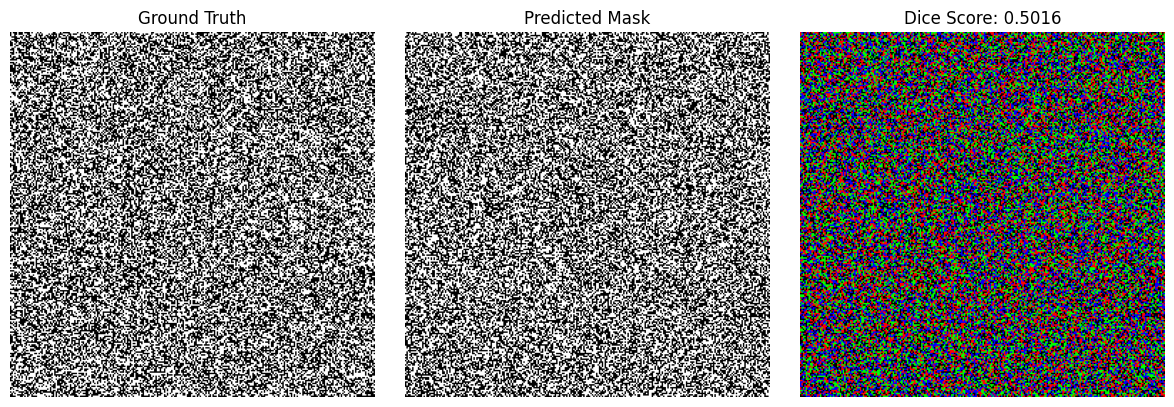

In [17]:
import torch

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true = y_true.float()
    y_pred = y_pred.float()
    intersection = torch.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (torch.sum(y_true) + torch.sum(y_pred) + smooth)

# Generate random binary masks using PyTorch
torch.manual_seed(42)  # Ensures reproducibility
y_true = torch.randint(0, 2, (1, 1, 256, 256))  # Ground truth mask
y_pred = torch.randint(0, 2, (1, 1, 256, 256))  # Predicted mask

# Compute Dice Score
dice = dice_coefficient(y_true, y_pred).item()

# Convert tensors to NumPy arrays for visualization
y_true_np = y_true.squeeze().numpy()
y_pred_np = y_pred.squeeze().numpy()

# Create an RGB overlay image
overlay = np.zeros((256, 256, 3), dtype=np.uint8)

# Green = True Positives (Correctly segmented)
overlay[(y_true_np == 1) & (y_pred_np == 1)] = [0, 255, 0]  

# Red = False Positives (Predicted but not in ground truth)
overlay[(y_true_np == 0) & (y_pred_np == 1)] = [255, 0, 0]  

# Blue = False Negatives (Missed segmentation)
overlay[(y_true_np == 1) & (y_pred_np == 0)] = [0, 0, 255]  

# Plot the masks
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(y_true_np, cmap="gray")
ax[0].set_title("Ground Truth")

ax[1].imshow(y_pred_np, cmap="gray")
ax[1].set_title("Predicted Mask")

ax[2].imshow(overlay)
ax[2].set_title(f"Dice Score: {dice:.4f}")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()


# Using TensorFlow

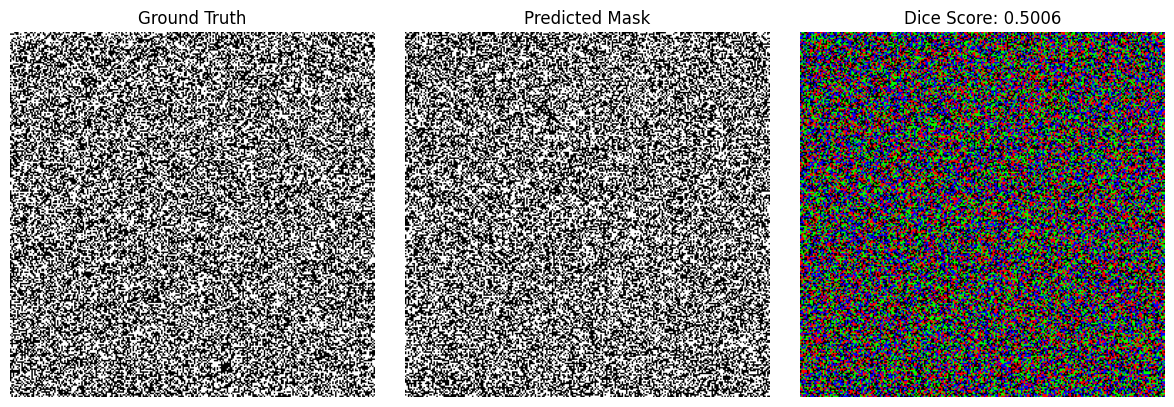

In [18]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

# Generate random binary masks using TensorFlow
tf.random.set_seed(42)  # Ensures reproducibility
y_true = tf.random.uniform((256, 256), minval=0, maxval=2, dtype=tf.int32)
y_pred = tf.random.uniform((256, 256), minval=0, maxval=2, dtype=tf.int32)

# Compute Dice Score
dice = dice_coefficient(y_true, y_pred).numpy()

# Convert tensors to NumPy arrays for visualization
y_true_np = y_true.numpy()
y_pred_np = y_pred.numpy()

# Create an RGB overlay image
overlay = np.zeros((256, 256, 3), dtype=np.uint8)

# Green = True Positives (Correctly segmented)
overlay[(y_true_np == 1) & (y_pred_np == 1)] = [0, 255, 0]  

# Red = False Positives (Predicted but not in ground truth)
overlay[(y_true_np == 0) & (y_pred_np == 1)] = [255, 0, 0]  

# Blue = False Negatives (Missed segmentation)
overlay[(y_true_np == 1) & (y_pred_np == 0)] = [0, 0, 255]  

# Plot the masks
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(y_true_np, cmap="gray")
ax[0].set_title("Ground Truth")

ax[1].imshow(y_pred_np, cmap="gray")
ax[1].set_title("Predicted Mask")

ax[2].imshow(overlay)
ax[2].set_title(f"Dice Score: {dice:.4f}")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()
